In [4]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib notebook

In [5]:

def N_exact(dt, lambda_, N_0, t_max):
    t = np.arange(0, t_max, dt)
    N = np.exp(-lambda_*t)*N_0
    return (t,N)

def N_euler(dt, lambda_, N_0, t_max):
    t = np.arange(0, t_max, dt)
    N = np.zeros_like(t)
    N[0]=N_0
    for i in range(1, len(N)):
        N[i] = (1-lambda_*dt)*N[i-1]
    return (t,N)
    

<IPython.core.display.Javascript object>


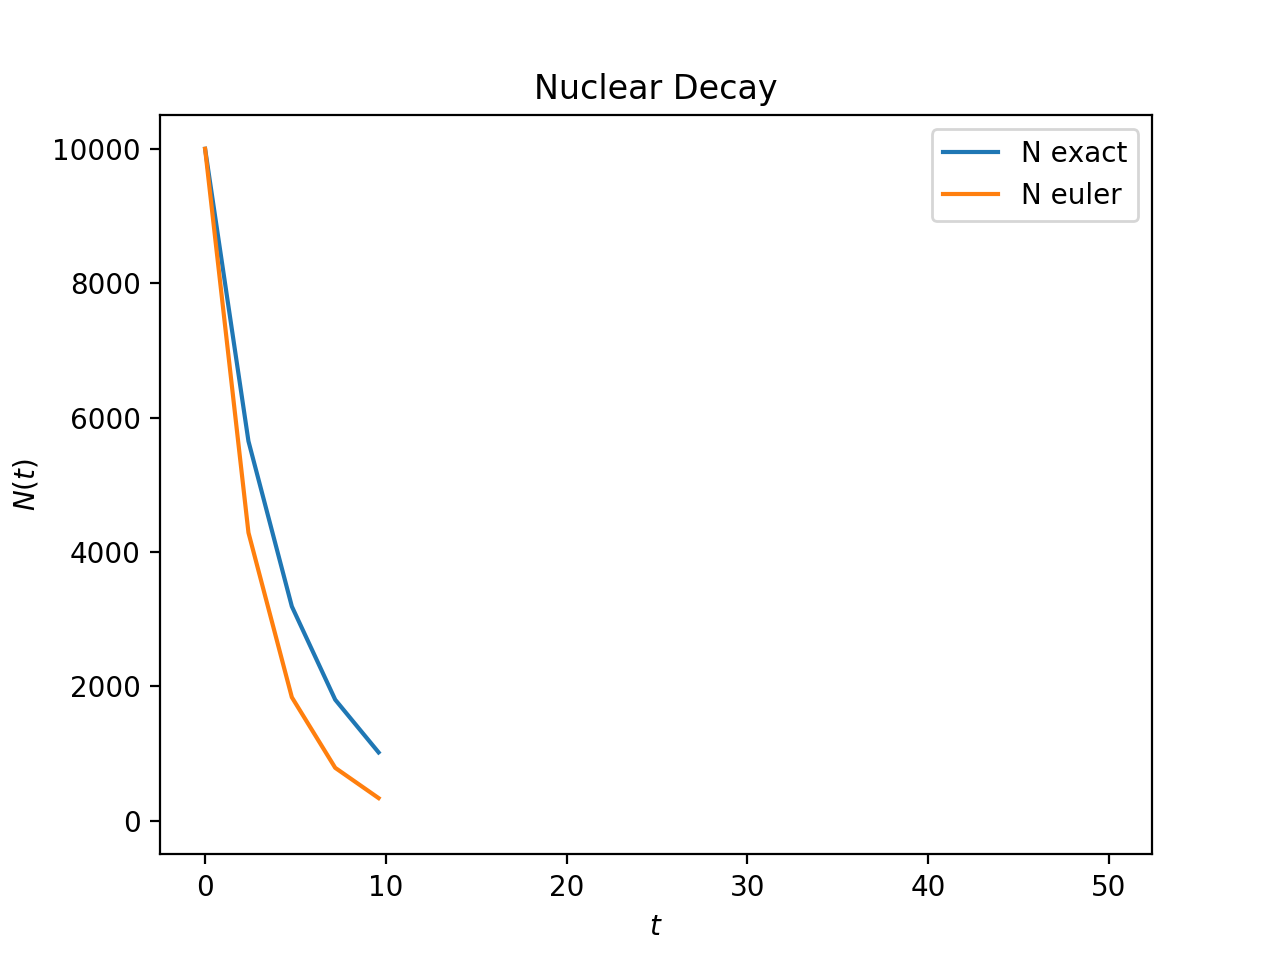

interactive(children=(FloatSlider(value=0.1, description='$\\Delta t$', max=3.0, min=0.1), FloatSlider(value=0…

In [6]:
N_0 = 10000
t_max=50

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
(t,N) = N_exact(0.1, 0.238, N_0, t_max)
line_exact, = ax.plot(t,N,label='N exact')
(t,N) = N_euler(0.1, 0.238, N_0, t_max)
line_euler, = ax.plot(t,N,label='N euler')
plt.legend()
plt.xlabel(r'$t$')
plt.ylabel(r'$N(t)$')
plt.title('Nuclear Decay')

def update(dt = 0.1, lambda_ = 0.238):
    (t,N) = N_exact(dt, lambda_, N_0, t_max)
    line_exact.set_xdata(t)
    line_exact.set_ydata(N)
    
    (t,N) = N_euler(dt, lambda_, N_0, t_max)
    line_euler.set_xdata(t)
    line_euler.set_ydata(N)
    
    fig.canvas.draw()

#interact(update, dt=(0.1,5,0.1), lambda_=(0.1,1,0.05));
interact(update, dt=widgets.FloatSlider(min=0.1,max=3,step=0.1,value=0.1, description=r'$\Delta t$'), 
         lambda_=widgets.FloatSlider(min=0.1,max=1,step=0.05,value=0.238, description=r'$\lambda$'));

## Pendulum

<IPython.core.display.Javascript object>


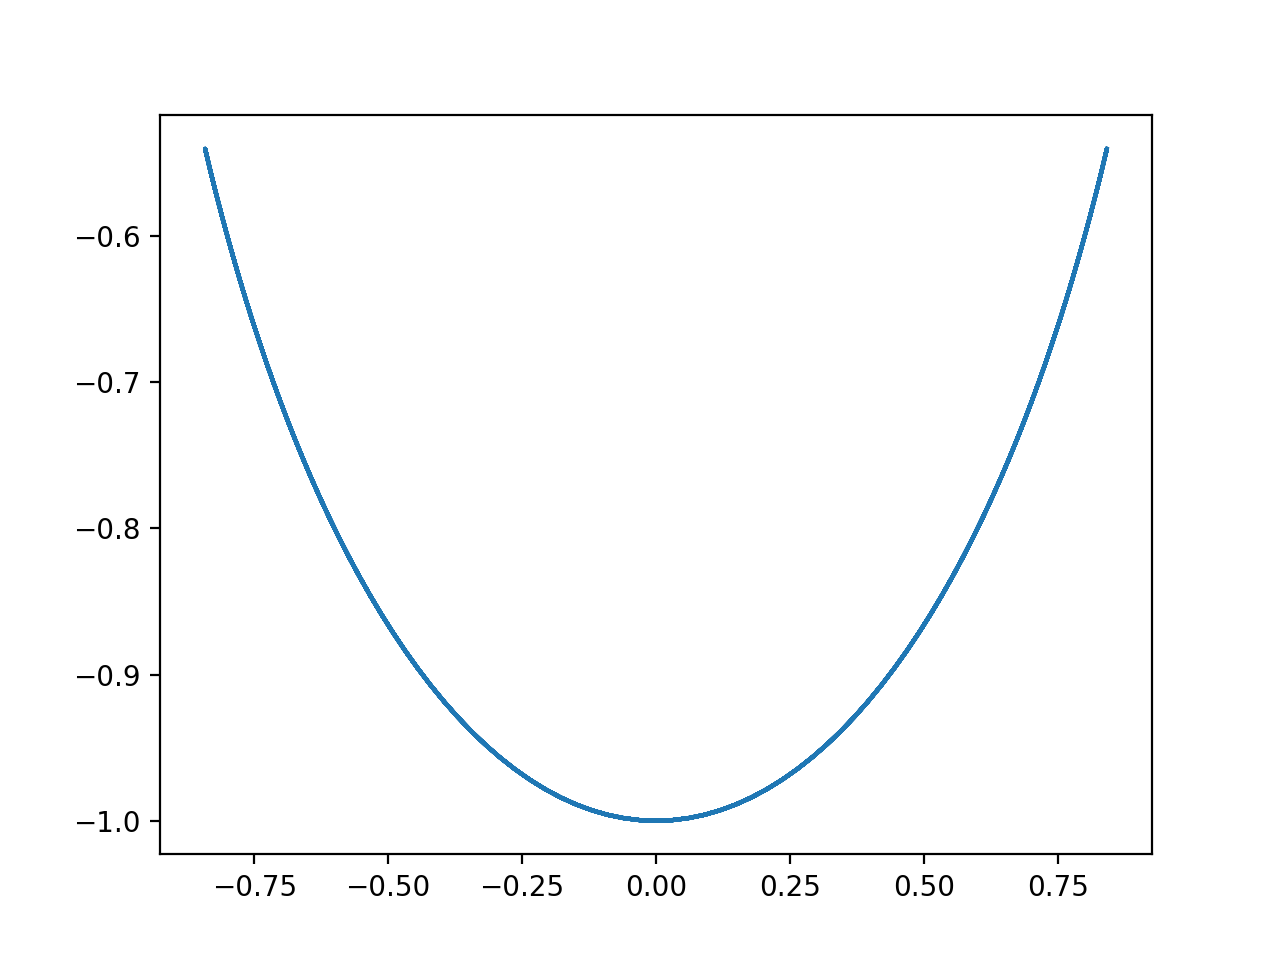

In [7]:
dt = 0.01
g = 9.8
L=1
theta = 1
omega = 0

t=0
t_max = 10
xs = []
ys = []

while(t<t_max):
    # Euler Cromer Aspel
    theta = theta + omega*dt
    omega = omega-g/L*np.sin(theta)*dt
    
    #Save data
    x = np.sin(theta)
    y = -np.cos(theta)
    xs.append(x)
    ys.append(y)
    t += dt

plt.figure()
plt.plot(xs,ys)
plt.show()